# Scanpy: Lipid Gene Figure

### Setup and Load Data

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
import scipy.sparse
import cmasher as cmr
from natsort import natsorted
import sys 
import os
sys.path.append(os.path.abspath("D:\jupyter_3_10\jl_modules"))
import sc_module as sm
from collections import OrderedDict
import decoupler as dc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80) 

# *** Input File ***  h5 file  
sample_name = r'sc78'
h5_file_path = r'../results/'
clustered_file = h5_file_path + sample_name + '_final.h5ad'

scanpy==1.10.1 anndata==0.8.0 umap==0.5.3 numpy==1.26.4 scipy==1.11.4 pandas==2.2.2 scikit-learn==1.1.1 statsmodels==0.14.2 igraph==0.10.8 louvain==0.8.2 pynndescent==0.5.7


### Read data

In [2]:
# clustered data
adata = sc.read_h5ad(clustered_file)
adata.uns['log1p']["base"] = None    # bug fix

print(adata.obs['sample'].value_counts())
print()
print('X matrix is sparse:', scipy.sparse.issparse(adata.X))
print('X size =', adata.X.shape)

sample
virulent3    6071
virulent2    4567
Name: count, dtype: int64

X matrix is sparse: False
X size = (10638, 22927)


In [3]:
# deal with bug in scanpy
plt.rcParams['axes.grid'] = False

In [4]:
# Create color map
my_cmap = sns.cubehelix_palette(start=.5, rot=-.75, dark=0, light=.98, as_cmap=True)

In [5]:
cluster_type = 'my_clust_1'

### Order for Figures

In [6]:
current_order = list(adata.obs[cluster_type].cat.categories)
print(current_order)
print()

new_order = ['11', '0', '2', '2b', '2c', 
             '18', '18b', 
             '22', '5', 
             '13', '14', '4', '20b', 
             '21', 
             '3', '3b', '3c', '25', 
             '19','15', '23', 
             '16', '8', '17', '7', '10', '9', 
             ]
print('Cluster numbers in adata not in new order:', [item for item in current_order if item not in new_order] )
print('Cluster numbers in new order not in adata:', [item for item in new_order if item not in current_order] )

['0', '10', '11', '13', '14', '15', '16', '17', '18', '18b', '19', '2', '20b', '21', '22', '23', '25', '2b', '2c', '3', '3b', '3c', '4', '5', '7', '8', '9']

Cluster numbers in adata not in new order: []
Cluster numbers in new order not in adata: []


### Cell Type Labels

From Final Annotation Figure

In [7]:
annotation_dict= {
'3': 'CAP1',
'3b': 'CAP2',
'3c': 'VEC',
'25': 'LEC',
    
'16': 'Ciliated',
'8': 'Secretory',
    
'17': 'AT1',
'7': 'AT2',
'10': 'AT2-t1',
'9': 'AT2-t2',
    
'19': 'AF1',
'15': 'AF2',
'23': 'Pericyte',
    
'21': 'Mesothelial',
    
'13': 'B1',
    
'14': 'T_naive',
'4': 'Th1',
    
'20b': 'NK',
    
'11': 'AM',
'2b': 'M-C1q',
'0': 'M-t1',
'2': 'M-t2',
'2c': 'iMon',
    
'18': 'DC',
'18b': 'pDC',
'22': 'N1',
'5': 'N2'
}

# Add cell type column based on annotation
adata.obs['cell_type_edit'] = [annotation_dict[clust] for clust in adata.obs[cluster_type]]

# Error checking
dict_list = list(annotation_dict.keys())
adata_list = list(adata.obs['my_clust_1'].unique())
print('Keys in dictionary not in adata:', [item for item in dict_list if item not in adata_list] )
print('Keys in adata not in dictionary:', [item for item in adata_list if item not in dict_list] )

Keys in dictionary not in adata: []
Keys in adata not in dictionary: []


In [8]:
celltype_list = []
for type in new_order:
    celltype_list.append(annotation_dict[type])

celltype_set = []
for x in celltype_list:
    if x not in celltype_set:
        celltype_set.append(x)

# print(celltype_set)
# for cell in celltype_set:
#     print(cell)

### Plots

<Axes: title={'center': 'cell_type_edit'}, xlabel='UMAP1', ylabel='UMAP2'>

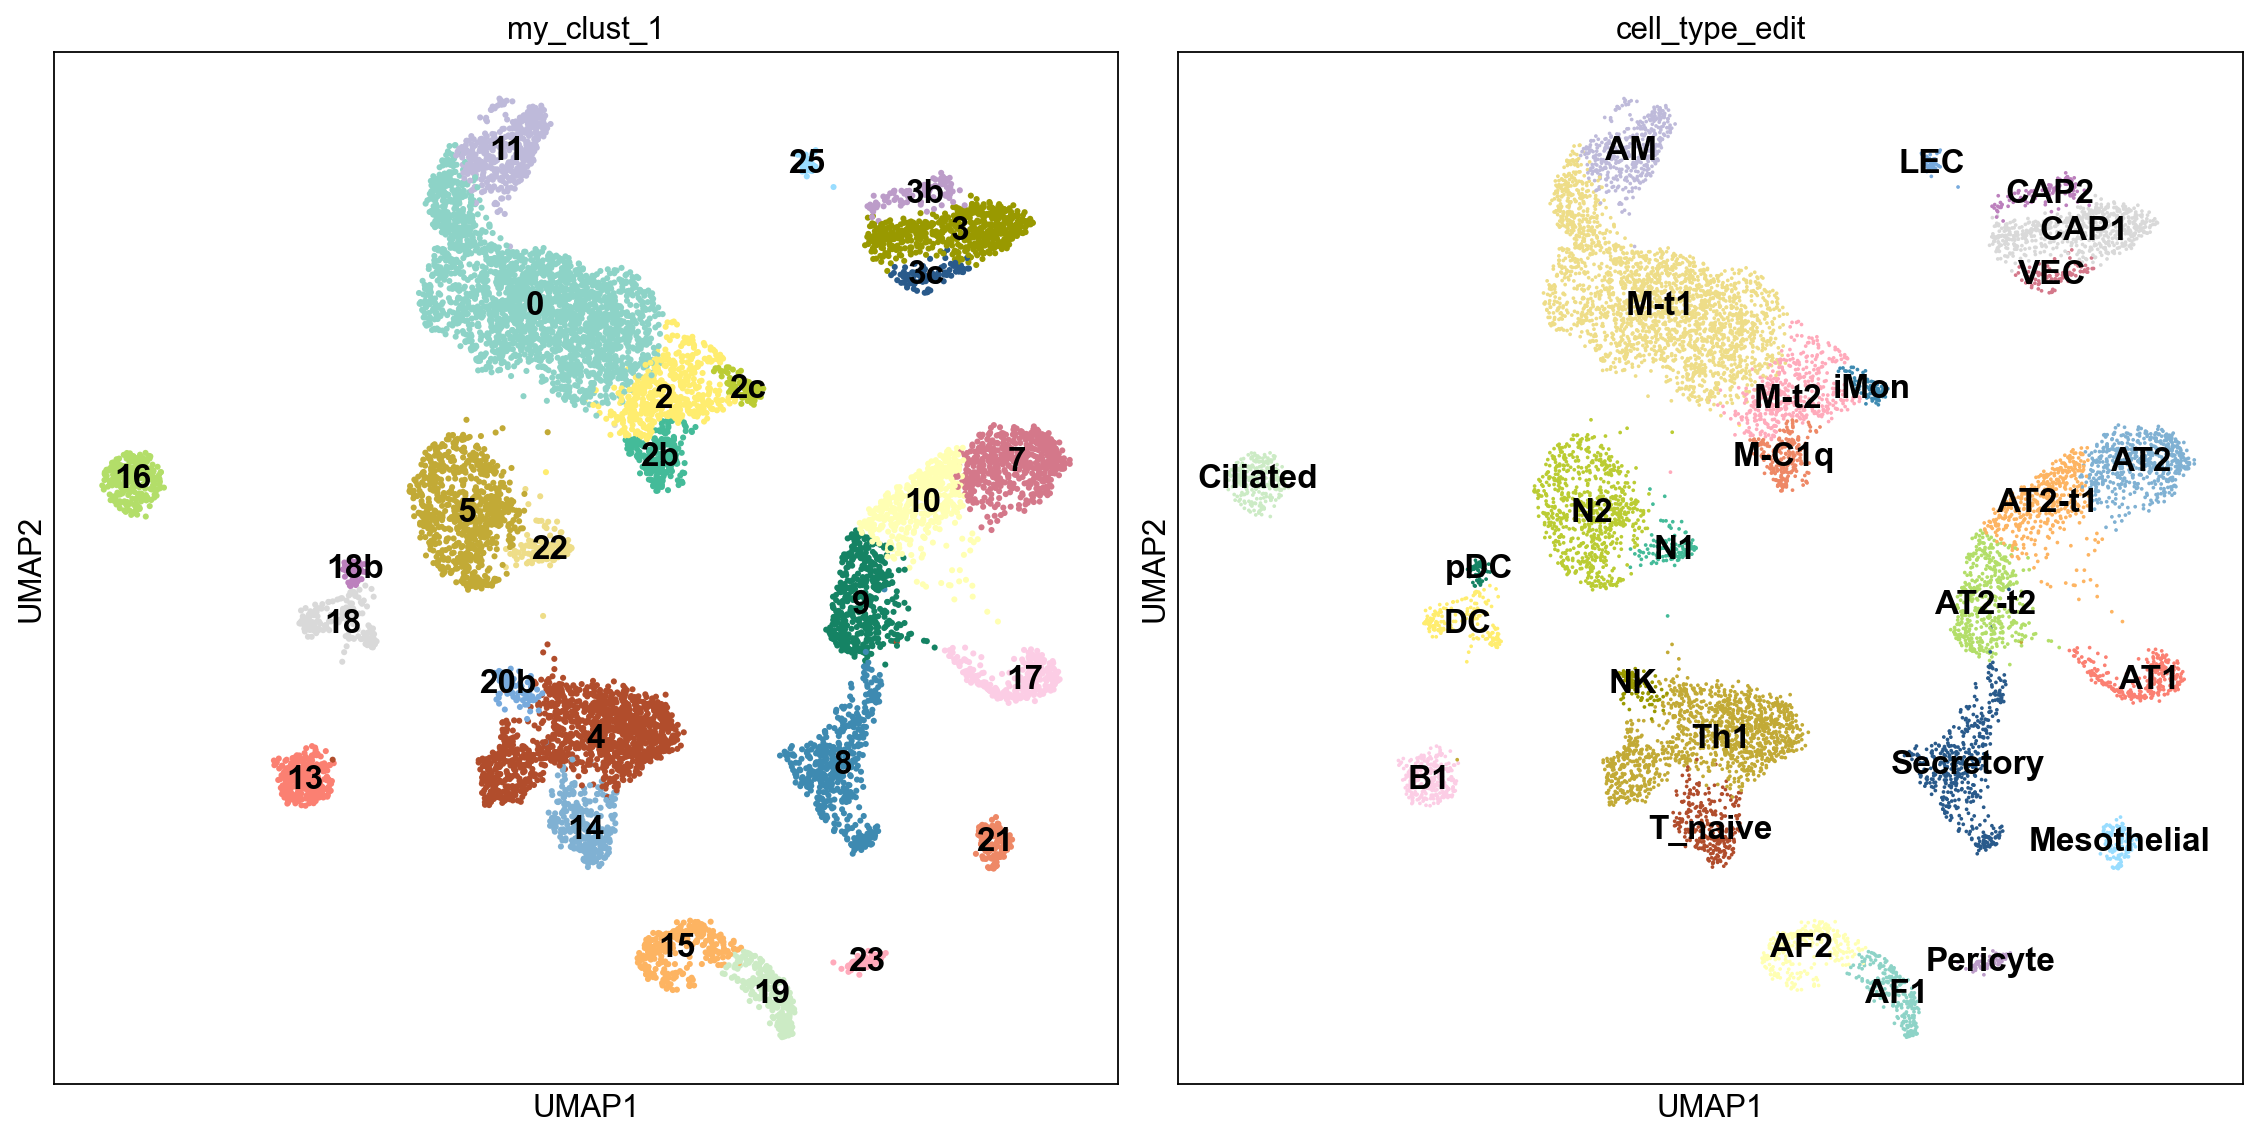

In [9]:
test_gene = 'C1qc' # 'Sgms1' 'Sgms2' 'Sphk1'
plt.rcParams.update({'font.size': 15})   # cluster labels
fig, axs = plt.subplots(1, 2, figsize=(14,7),constrained_layout=True)
sc.pl.umap(adata, color=cluster_type, size=30, ax=axs[0], show=False, legend_loc='on data', palette=sm.wes)
sc.pl.umap(adata, color='cell_type_edit', ax=axs[1], show=False, legend_loc='on data', palette=sm.wes)

### Examine Lipid Genes

In [10]:
lipid_genes = ["Sptlc1", "Sptlc2", "Sptlc3", "Kdsr", "Cers1", "Cers2", "Cers3", "Cers4", "Cers5", "Cers6", 
            "Degs1", "Degs2", "Sgms1", "Sgms2", "Samd8", "Cerk", "Acer1", "Acer2", "Acer3", "Asah1", "Asah2", 
            "Sphk1", "Sphk2", "Sgpl1", "Sgpp1", "Sgpp2", "Ugcg", "Galc", "Smpd1", "Smpd2", "Smpd3", "Smpd4", 
            "Gba", "Gba2", "Gba3"]

# find genes not expresssed
not_expressed = [item for item in lipid_genes if item not in list(adata.var.index)]
print('Lipid genes that are not expressed:', not_expressed)

sphingolipid_genes = ["Hexa", "Hexb", "Gla", "Glb1", "Arsa", "Gal3st1", "B4galnt1", 
                    "B4galt5", "B4galt6", "Neu1", "Neu2", "Neu3"]

metabolizing_genes = ["Plpp1", "Plpp2", "Plpp3", "Cptp"]

Lipid genes that are not expressed: ['Acer1', 'Gba3']


### Create dataframes

In [11]:
# create basic dataframe with all expressed genes represented

# get genes that are expressed
expressed = [x for x in lipid_genes if x not in not_expressed]

# select lipid genes from adata
df = adata[:, expressed].to_df()
df['cell_type_edit'] = adata.obs['cell_type_edit']
df.set_index('cell_type_edit', inplace=True)

# calculate means for each gene in each cell type
df = df.groupby(level=0, observed=False).mean().T
# df

#### Ordered Dataframe

In [12]:
# Create dataframe ordered on cell and gene order

# 1. Cell order

cell_order = ["AM", "M-t1", "M-lc", "M-t2", "M-C1q", "iMon", "DC", "pDC", "N1", "N2", "B1", "B2", "T_naive", "Th1", 
"T_ex", "Treg", "NK", "Mesothelial", "CAP1", "CAP2", "AEC", "VEC", "LEC", "AF1", "AF2", "Pericyte", "SMC", "Ciliated", 
"Secretory", "AT1", "AT2", "AT2-t1", "AT2-t2"]

# Filter the list to keep only DataFrame column names
filtered_list = [item for item in cell_order if item in df.columns]
# reorder cells to match cell_order list
df_ordered = df.reindex(columns=filtered_list)

# df_ordered

# 2. Gene order

# add columns of zeros for genes that are not expressed
df_complete = df_ordered.T
for col in not_expressed:
    df_complete[col] = 0
    
# reindex genes to original order in lipid_genes
df_complete = df_complete.reindex(columns=lipid_genes).T

# df_complete

In [13]:
# Create data frame order on sum or gene expresion levels

# reorder genes to match expression levels
df_sorted = df_complete.loc[df.sum(axis=1).sort_values(ascending=False).index]

### Human Ordered Heatmaps

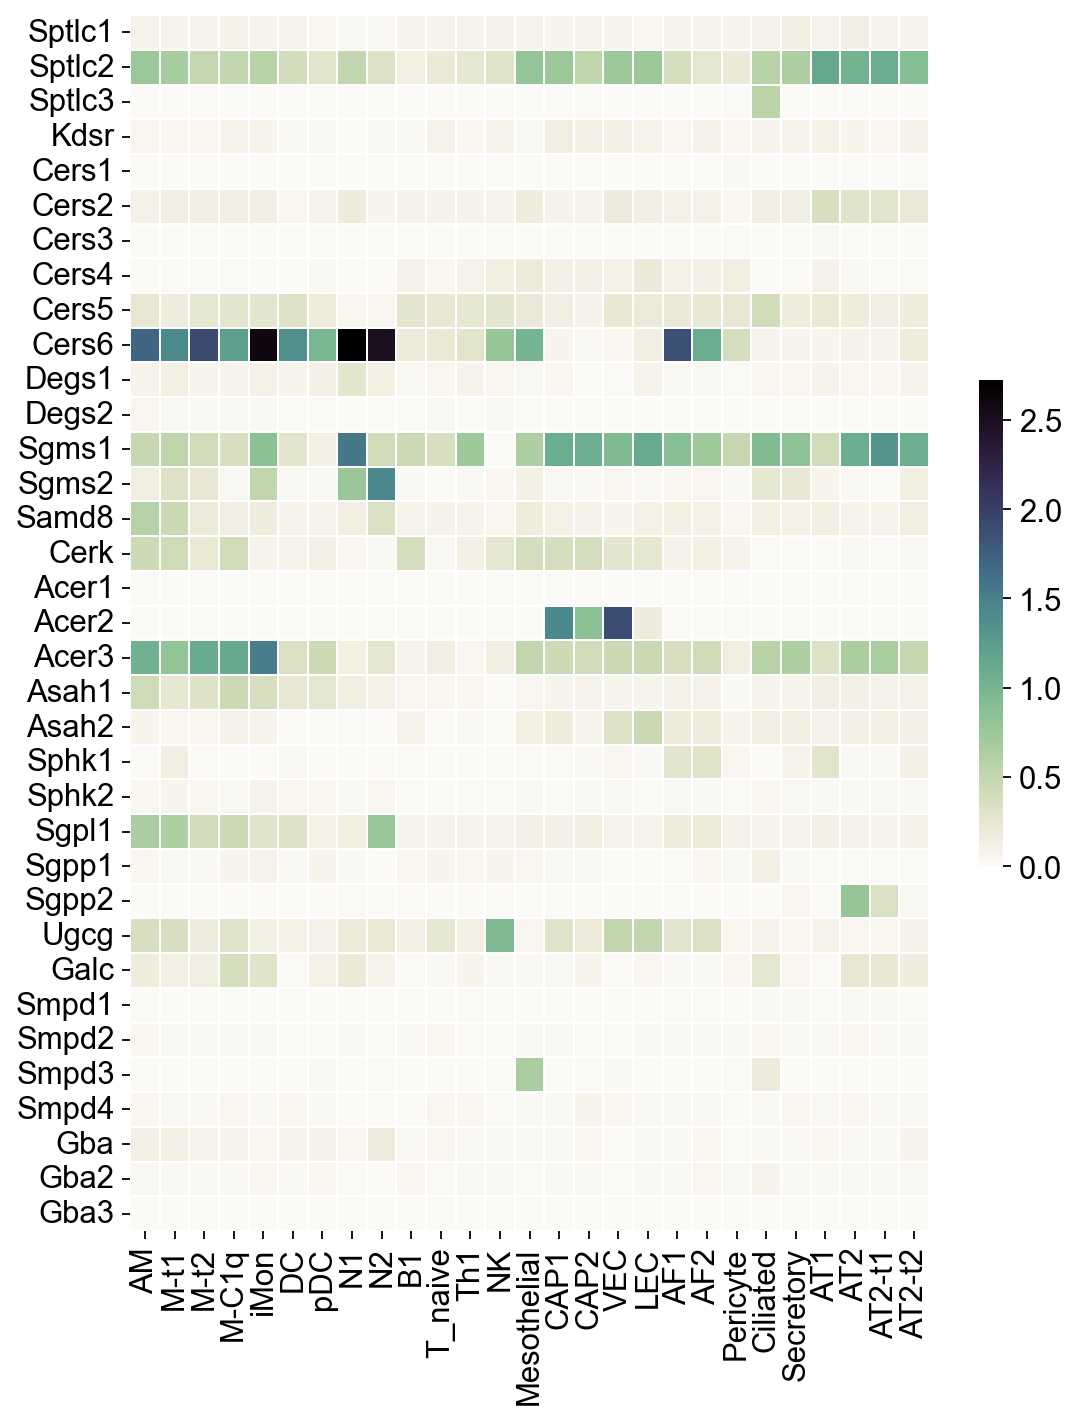

In [25]:
rcParams['figure.figsize'] = 8, 10

g = sns.heatmap(df_complete, xticklabels=True, yticklabels=True, 
                cmap=my_cmap, cbar_kws = {'shrink':.4},
                linewidths=0.005, linecolor='white')
# remove x label
g.set(xlabel='')
plt.show()

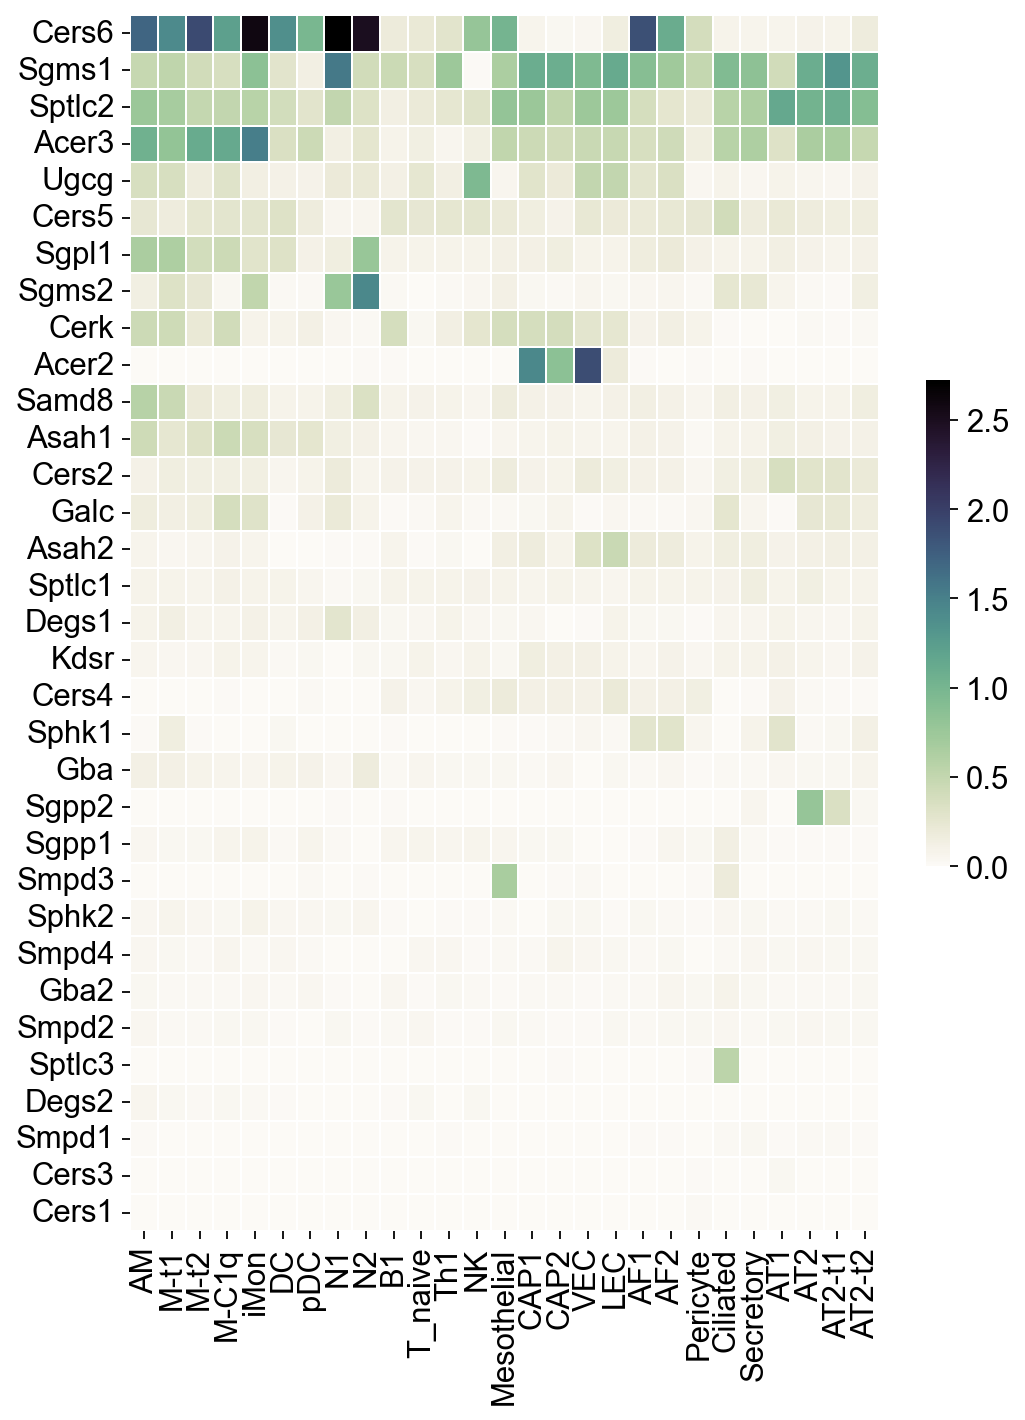

In [15]:
# ordered on sum of rows
g = sns.heatmap(df_sorted, xticklabels=True, yticklabels=True, 
                cmap=my_cmap, cbar_kws = {'shrink':.4},
                linewidths=0.005, linecolor='white')
# remove x label
g.set(xlabel='')
plt.show()

### Clustered Heatmaps

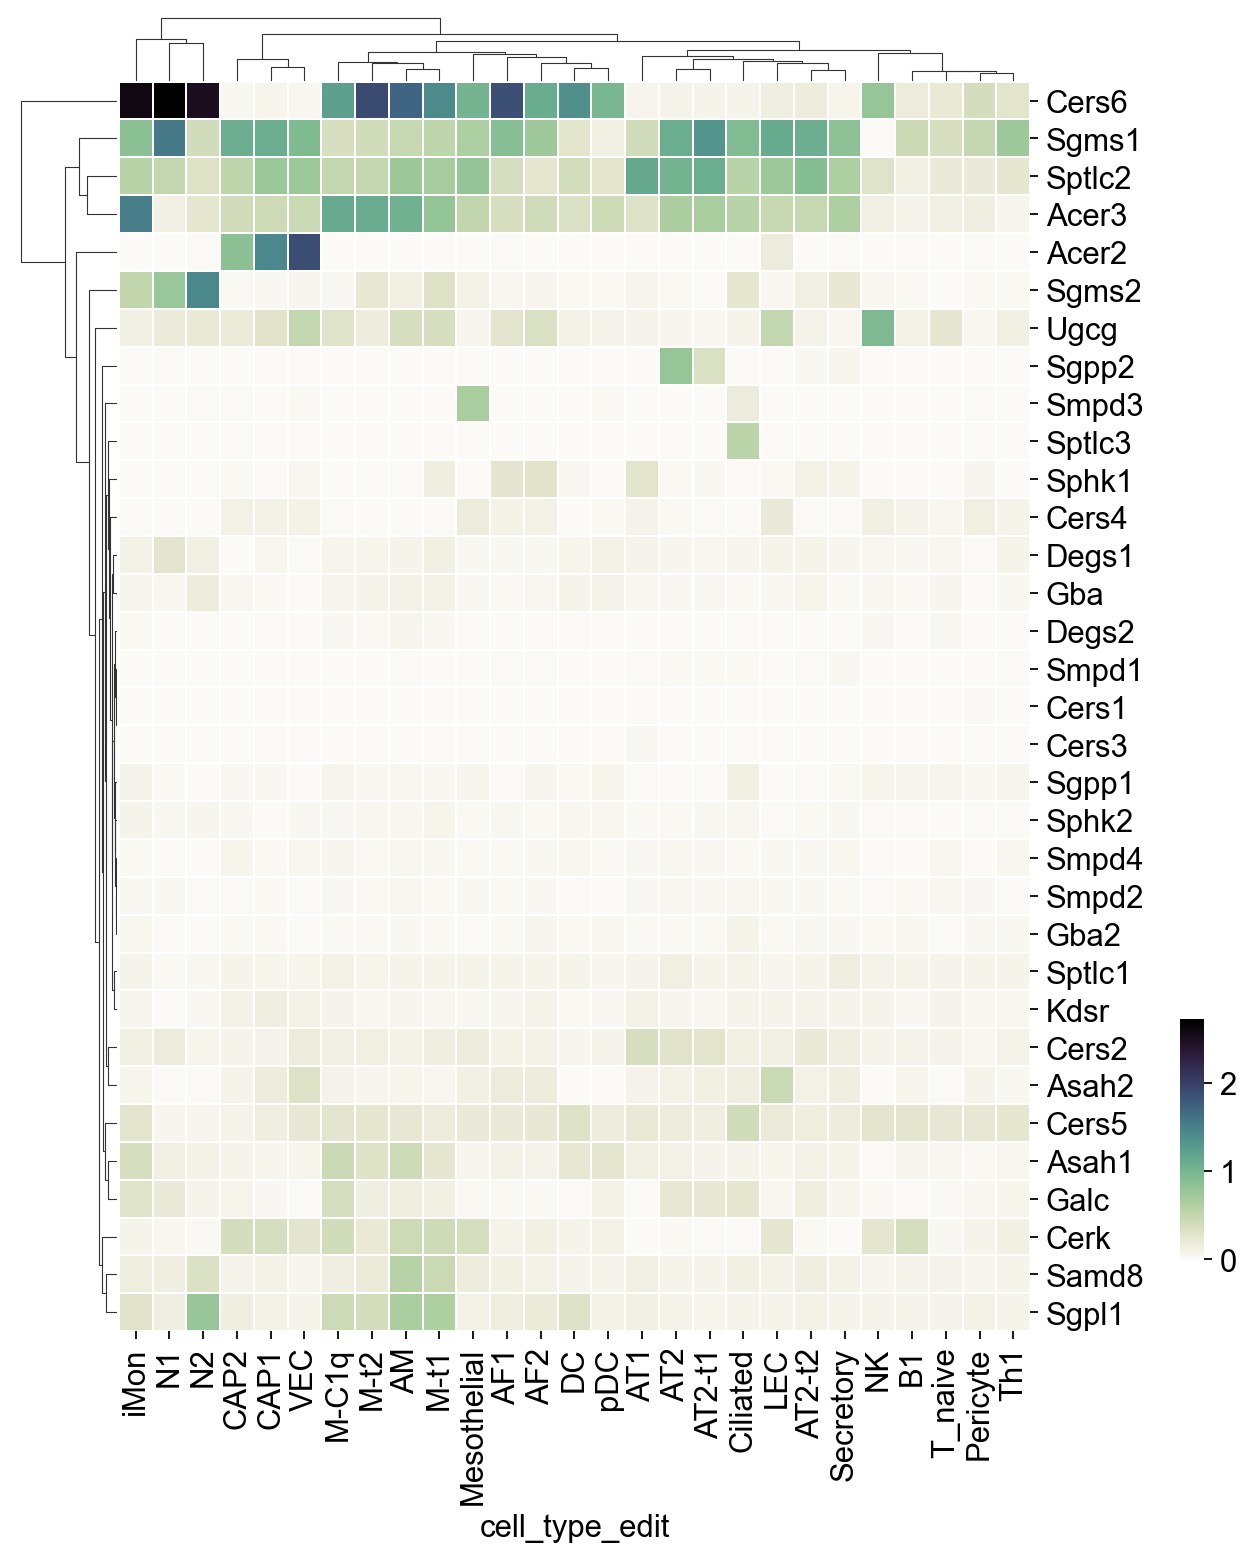

In [16]:
g = sns.clustermap(df, xticklabels=True, yticklabels=True, figsize=(7.5, 10), 
                    cmap=my_cmap, 
                    dendrogram_ratio=(.1, .05), linewidths=0.005, linecolor='white',
                    cbar_pos=(1, .2, .02, .15))

#### z-score + clustered on both axes

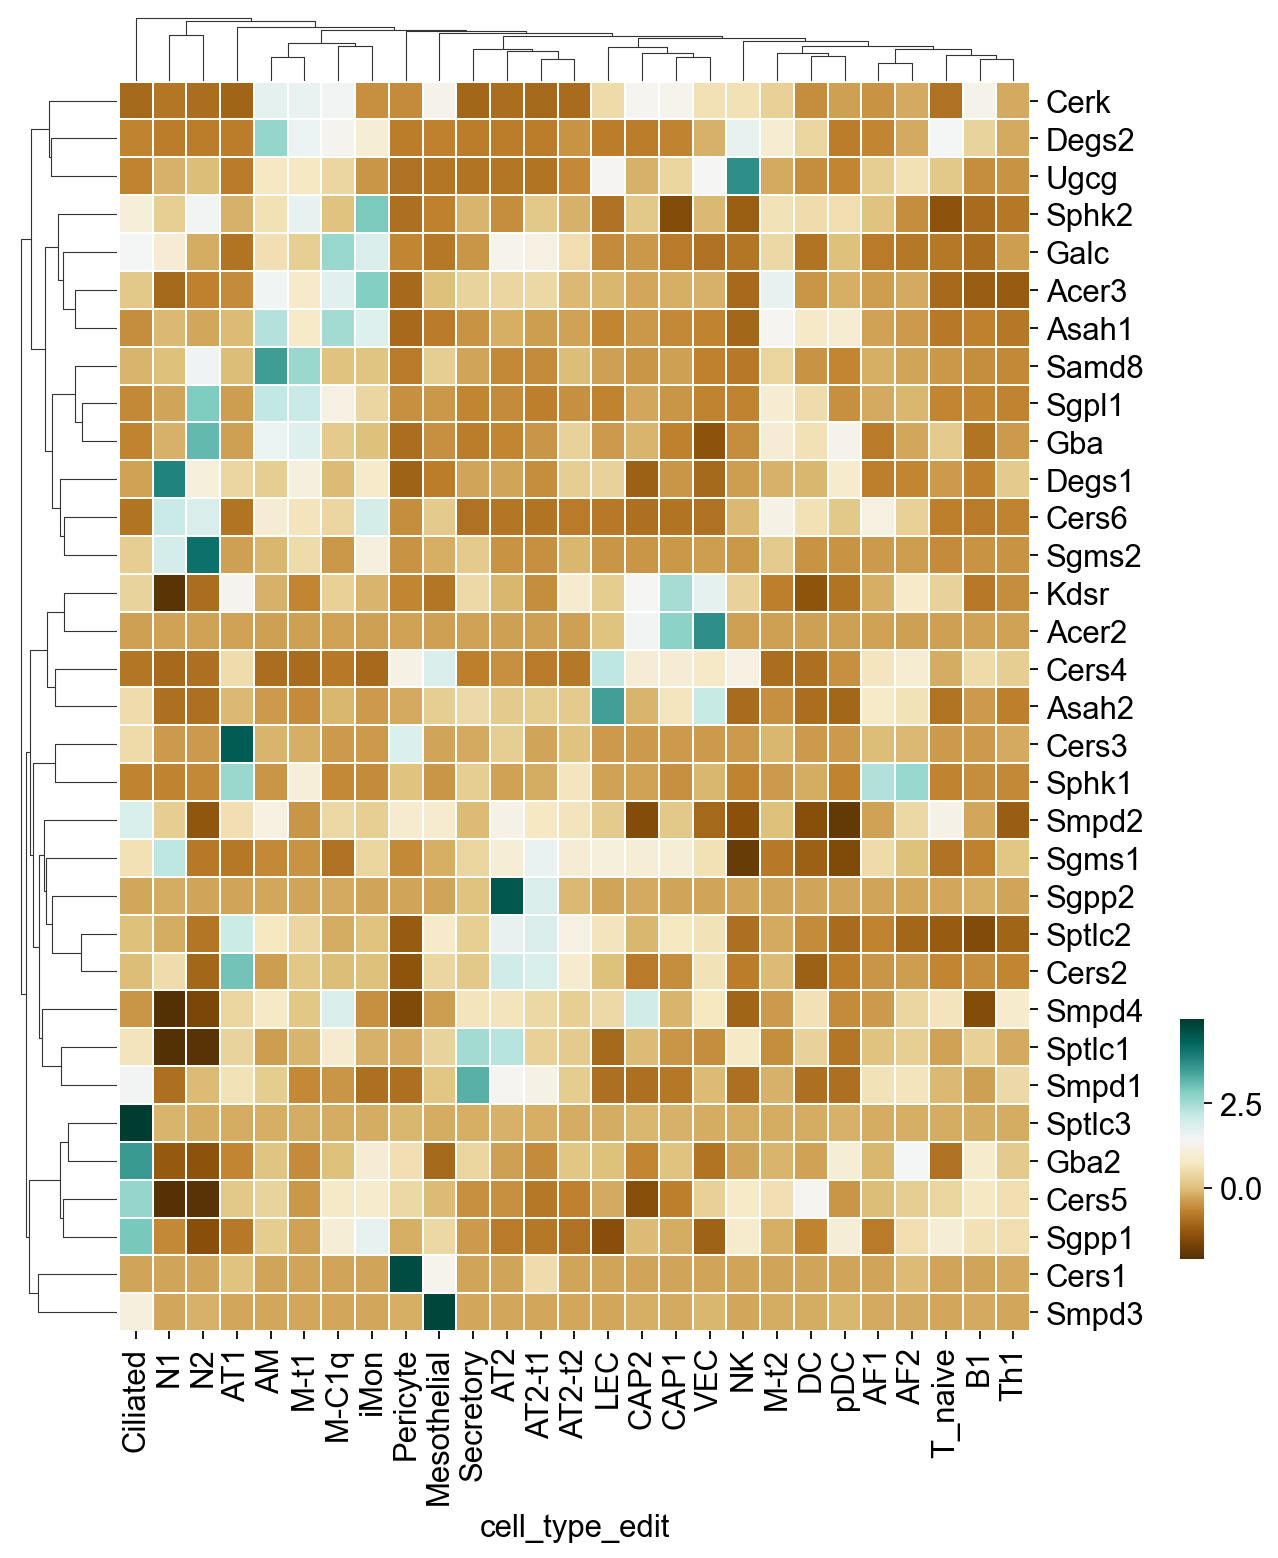

In [17]:
# Normalize by row/gene:
g = sns.clustermap(df, z_score=0, xticklabels=True, yticklabels=True, figsize=(7.5, 10), cmap="BrBG", 
    dendrogram_ratio=(.1, .05), linewidths=0.005, linecolor='white',
    cbar_pos=(1, .2, .02, .15))

#### z-score + clustered on gene axes

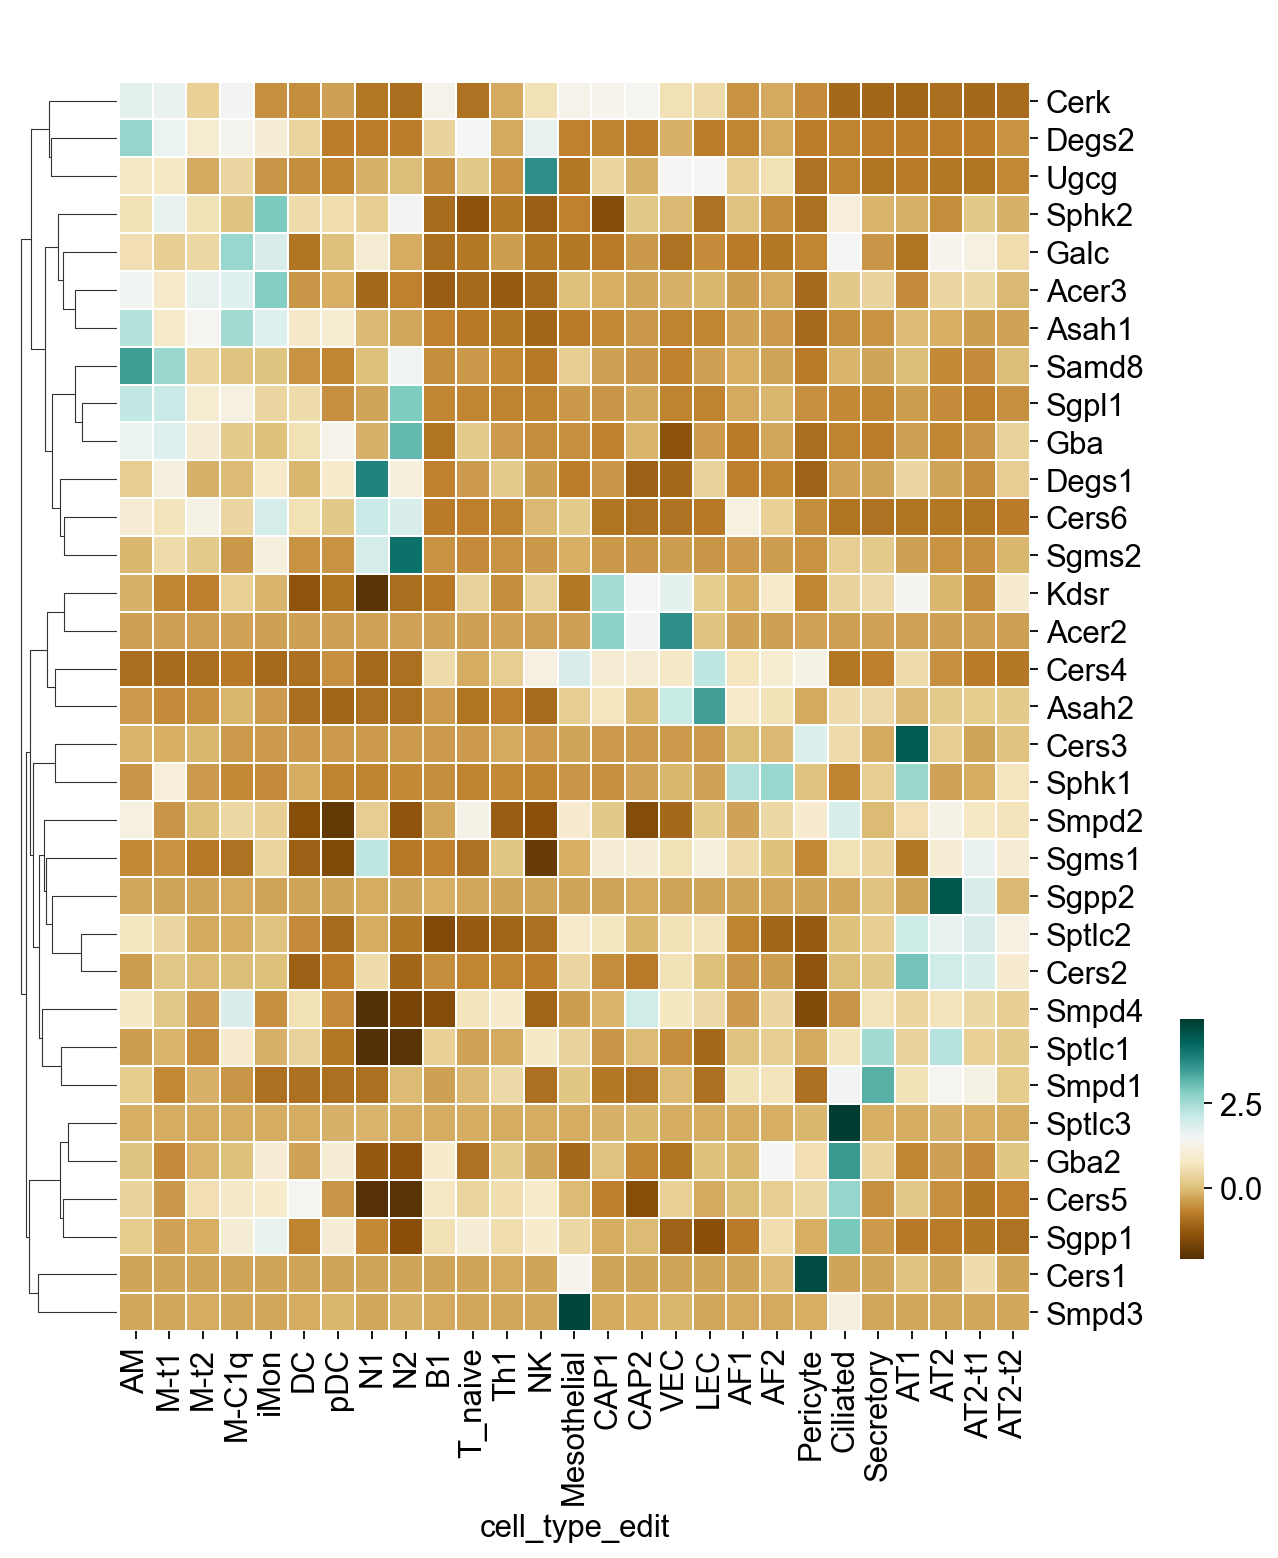

In [18]:
# Normalize by row/gene:
g = sns.clustermap(df_ordered, z_score=0, xticklabels=True, yticklabels=True, figsize=(7.5, 10), cmap="BrBG", 
    dendrogram_ratio=(.1, .05), linewidths=0.005, linecolor='white', col_cluster=False,
    cbar_pos=(1, .2, .02, .15))

### Correlation Plots

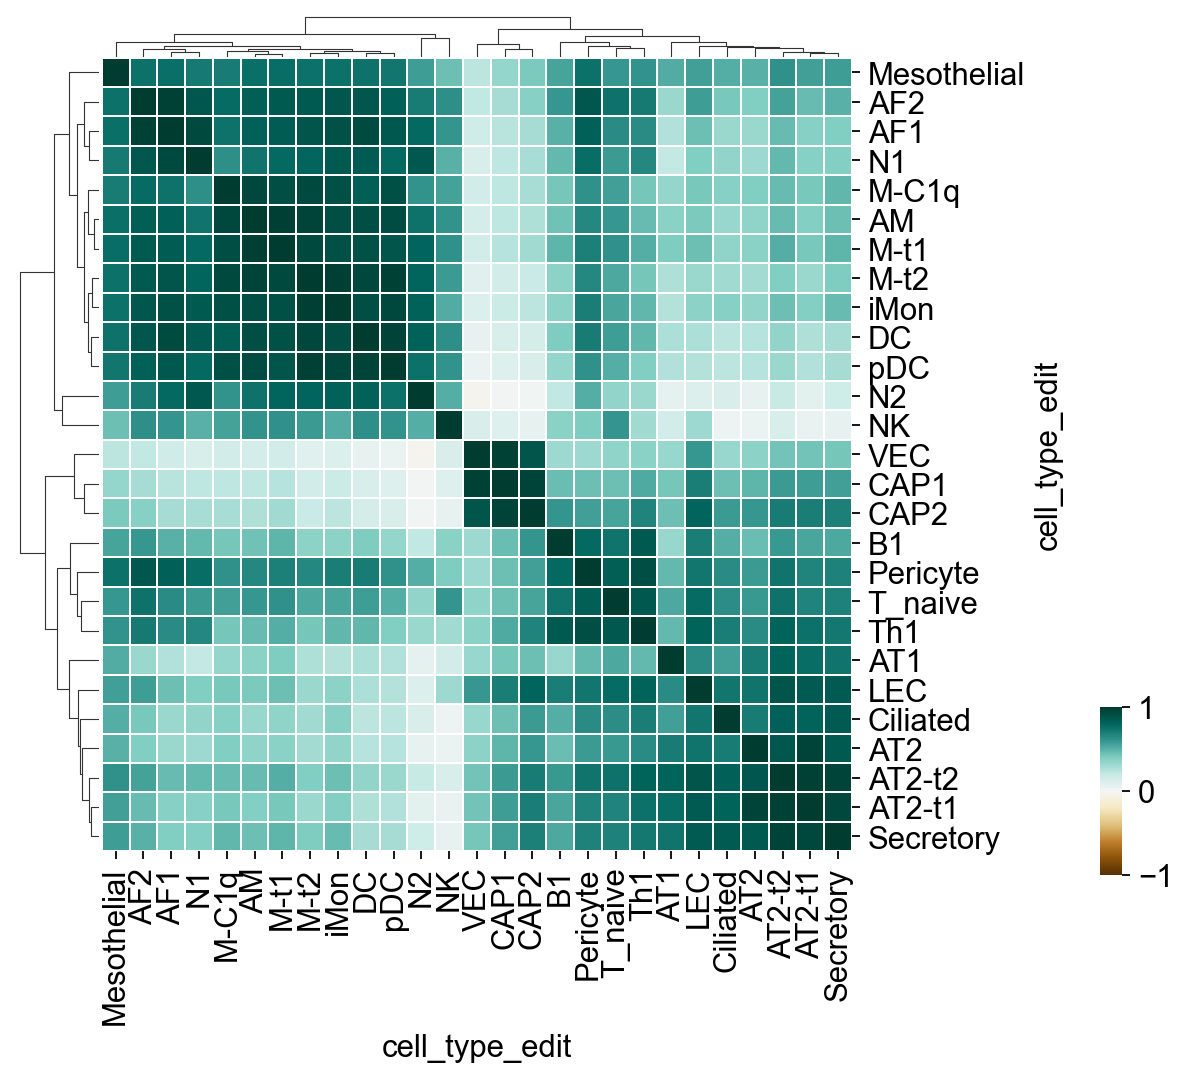

In [19]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

g = sns.clustermap(df.corr(), vmin=-1, vmax=1, xticklabels=True, yticklabels=True, figsize=(7,7), cmap='BrBG', 
    dendrogram_ratio=(.1, .05), linewidths=0.005, linecolor='white',
    cbar_pos=(1, .2, .02, .15))

# corr = df.corr()
# mask = np.triu(np.ones_like(corr))
# values = g.ax_heatmap.collections[0].get_array().reshape(corr.shape)
# new_values = np.ma.array(values, mask=mask)
# g.ax_heatmap.collections[0].set_array(new_values)

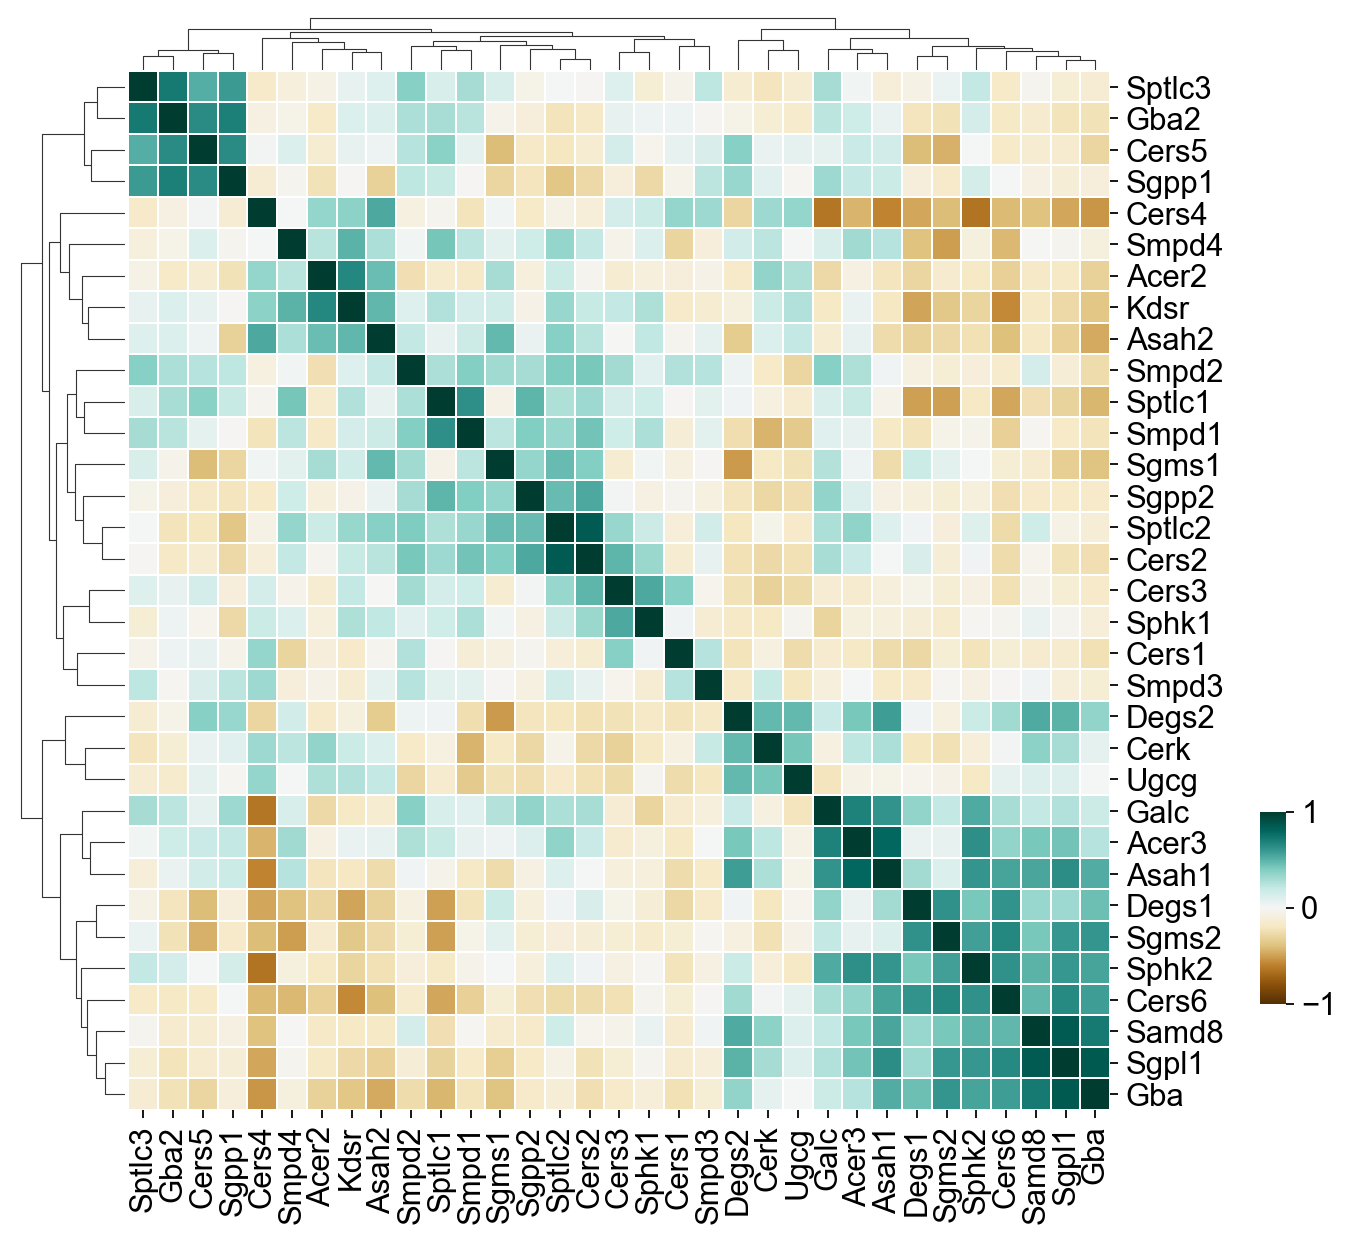

In [20]:
g = sns.clustermap(df.T.corr(), vmin=-1, vmax=1, xticklabels=True, yticklabels=True, figsize=(8,8), cmap="BrBG",
    dendrogram_ratio=(.1, .05), linewidths=0.005, linecolor='white',
    cbar_pos=(1, .2, .02, .15))

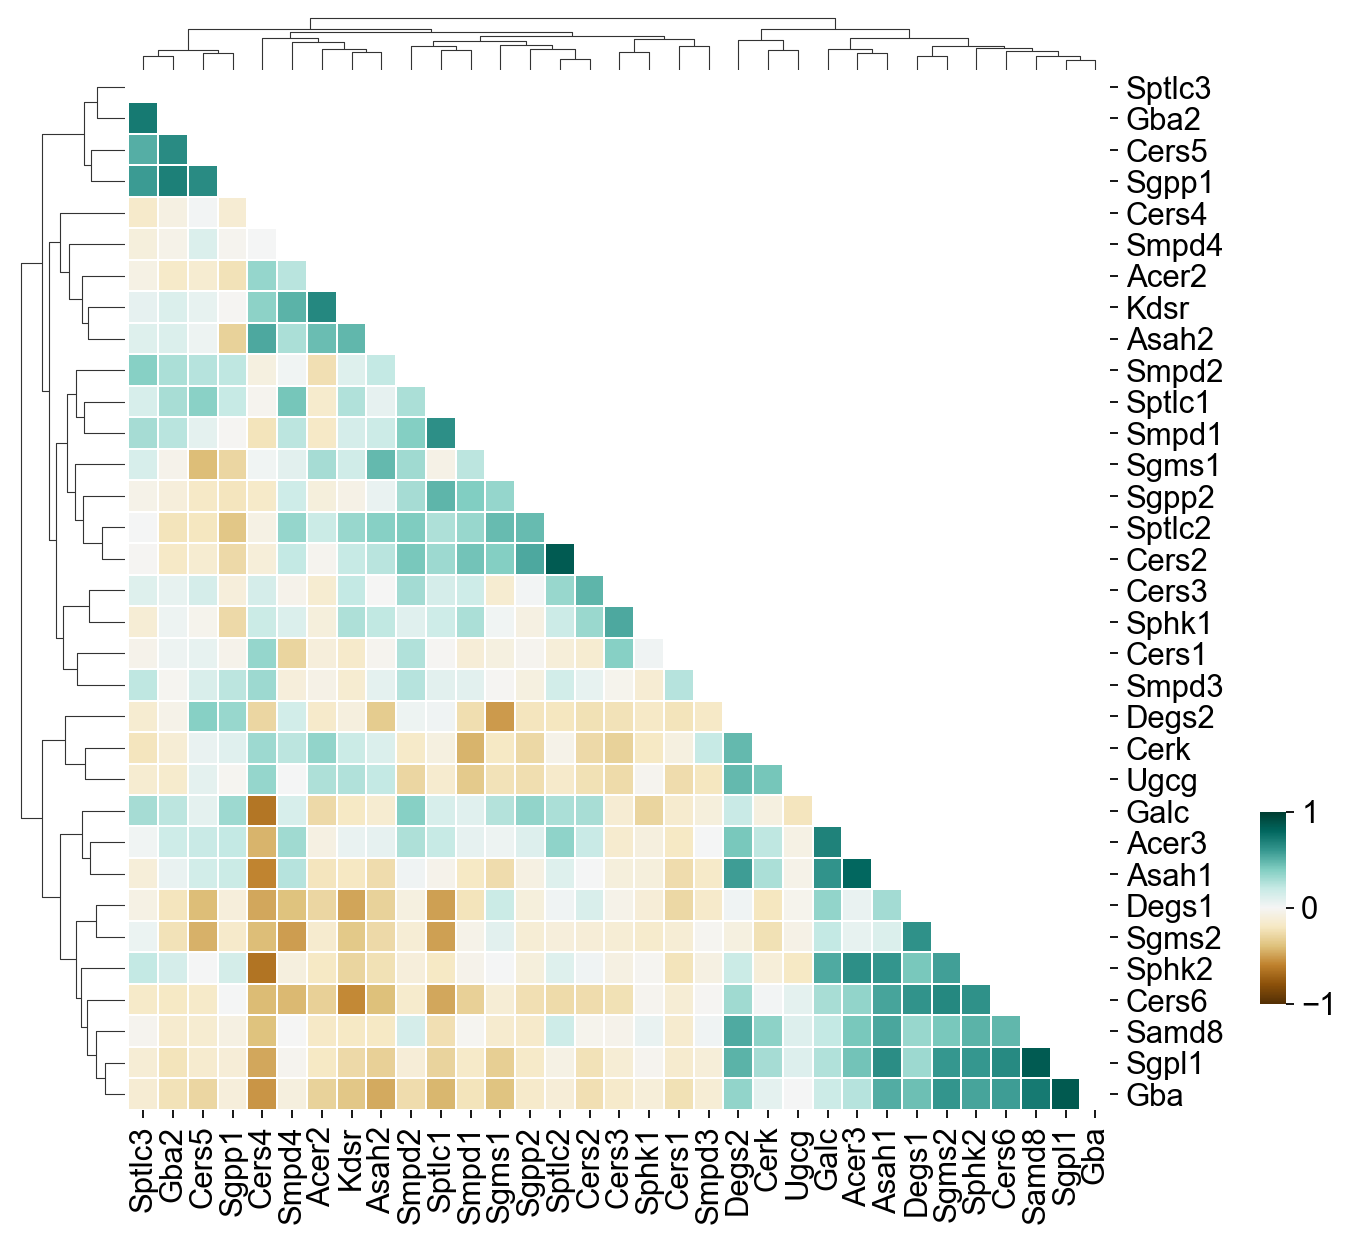

In [21]:
g = sns.clustermap(df.T.corr(), vmin=-1, vmax=1, xticklabels=True, yticklabels=True, figsize=(8,8), cmap="BrBG",
    dendrogram_ratio=(.1, .05), linewidths=0.005, linecolor='white',
    cbar_pos=(1, .2, .02, .15))

corr = df.T.corr()
mask = np.triu(np.ones_like(corr))
values = g.ax_heatmap.collections[0].get_array().reshape(corr.shape)
new_values = np.ma.array(values, mask=mask)
g.ax_heatmap.collections[0].set_array(new_values)

#### Macrophage only

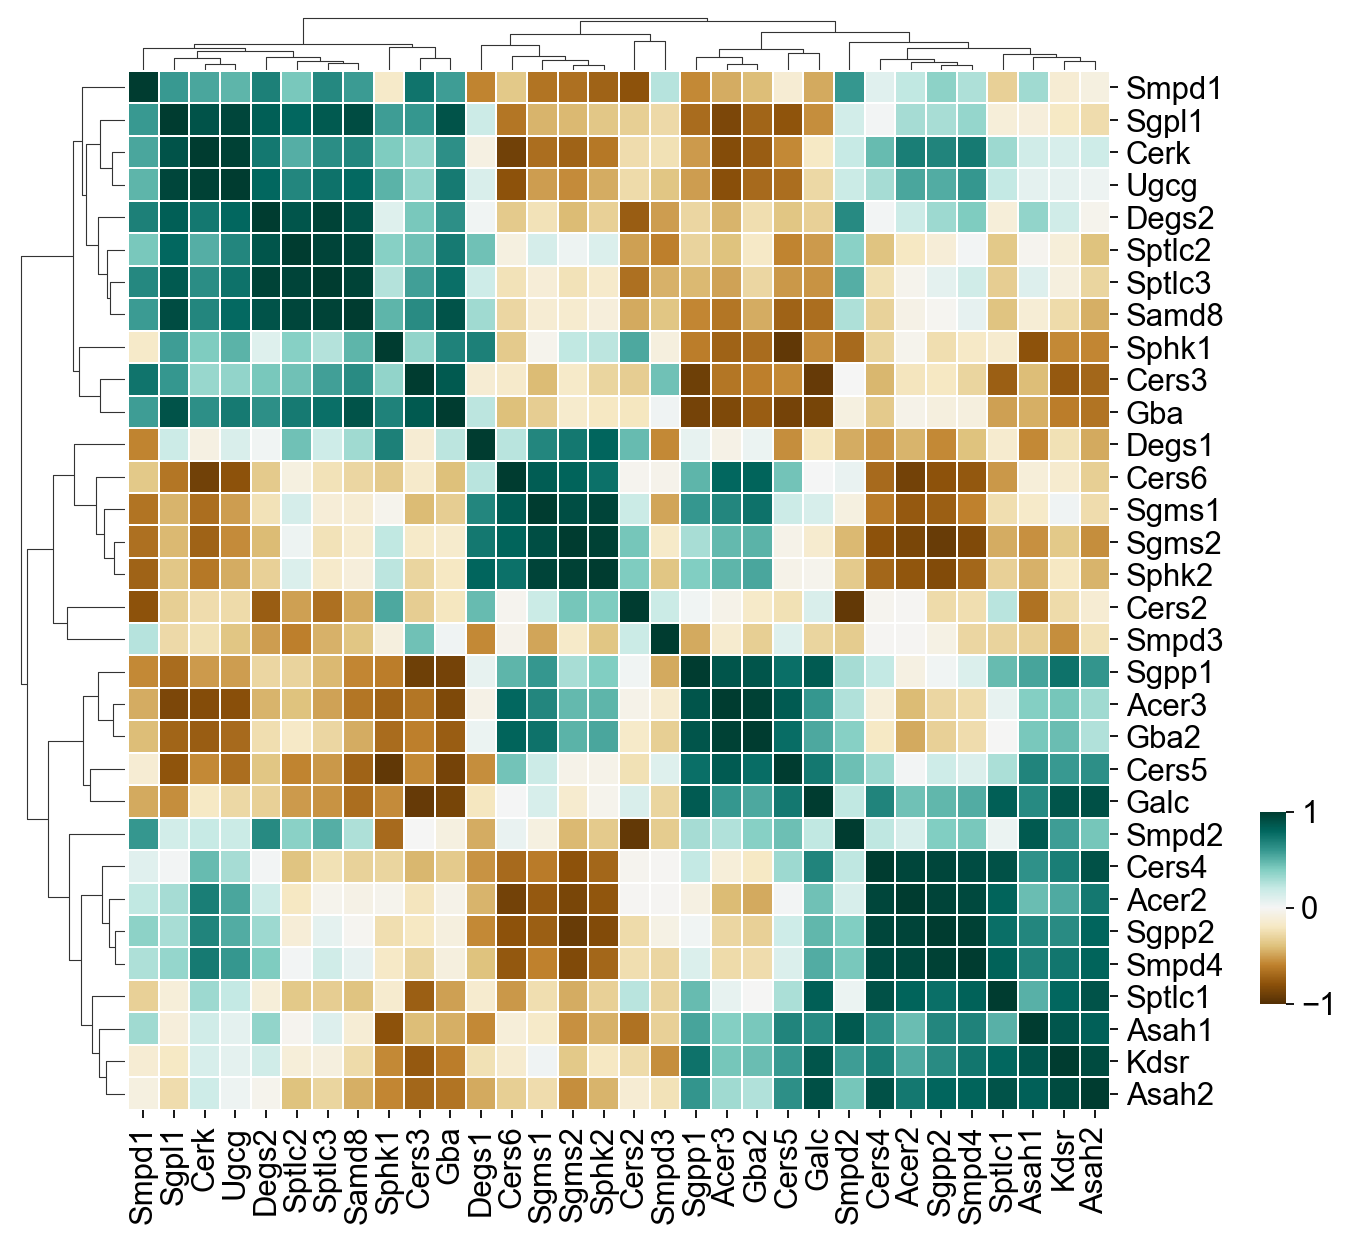

In [22]:
dfm = df[['AM', "M-t1", "M-t2",'M-C1q','iMon']].T
  
dfm = dfm.drop(columns = ['Cers1']) # check for non expressed genes
# dfm.corr()

g = sns.clustermap(dfm.corr(), vmin=-1, vmax=1, xticklabels=True, yticklabels=True, figsize=(8,8), cmap="BrBG",
    dendrogram_ratio=(.1, .05), linewidths=0.005, linecolor='white',
    cbar_pos=(1, .2, .02, .15))

### Dotplot

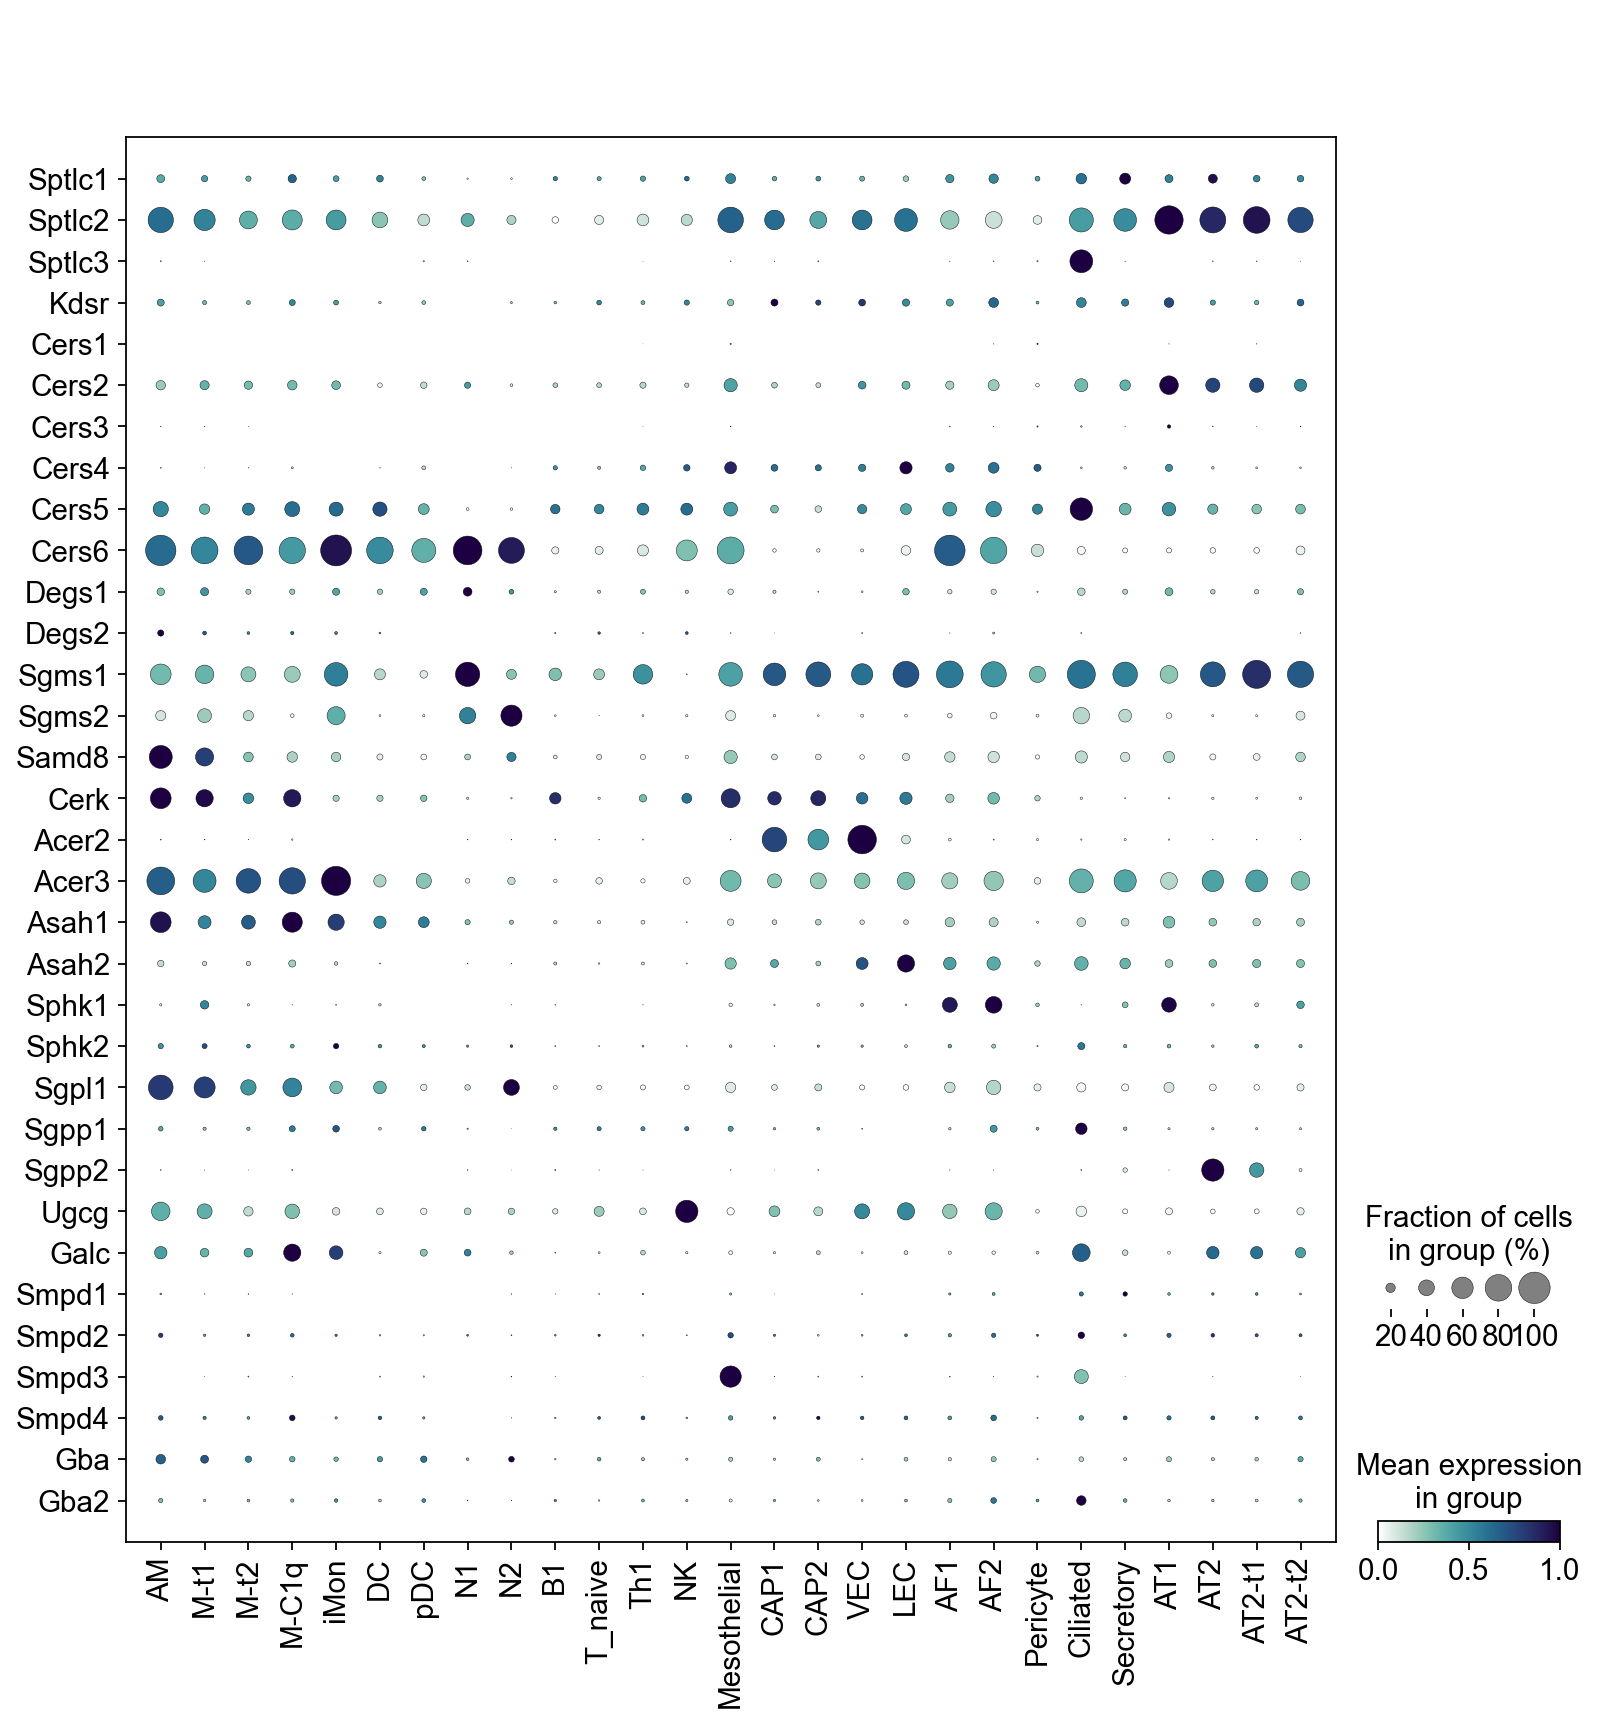

In [23]:
plt.rcParams.update({'font.size': 16}) 
standard_scale='var'
# standard_scale=None
sc.pl.dotplot(adata, expressed, swap_axes=True, groupby='cell_type_edit', categories_order=celltype_set, 
              cmap=cmr.ocean_r, dendrogram=False, standard_scale=standard_scale)

In [24]:
stop here

SyntaxError: invalid syntax (4067800170.py, line 1)

In [ ]:
def process_text_file(filename):
    try:
        # Open and read the file
        with open(filename, 'r') as file:
            # Read the entire content
            content = file.read()
            
            # Split the content into words
            # This will split on any whitespace (spaces, tabs, newlines)
            words = content.split()
            
            # Remove any empty strings
            words = [word for word in words if word.strip()]
            
            # Format each word with quotes and join with commas
            formatted_words = ', '.join(f'"{word}"' for word in words)
            
            # Print the result
            print(formatted_words)
            
    except FileNotFoundError:
        print(f"Error: The file '{filename}' was not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Call the function with your file name
# process_text_file("lipid genes.txt")
# process_text_file("cell_order.txt")
process_text_file("gene order.txt")